In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Determine stellar mass still living today
Stars with $M < 0.8 M_\odot$ have lifetimes longer than 13 Gyr.  Use a Kroupa IMF -- $\xi(m) \propto m^{-\alpha}$

In [2]:
slopes = [0.3, 1.3, 2.3]
mbound = [(0.01, 0.08), (0.08, 0.5), (0.5, 100)]

In [9]:
N = 1000
mass = np.logspace(np.log10(mbound[0][0]), np.log10(mbound[-1][1]), N)
imf = np.empty(N)

In [30]:
xi0 = 1.0
for i in range(len(slopes)):
    im = np.where((mass >= mbound[i][0]) & (mass < mbound[i][1]))[0]
    # Force the last mass bin to be included (<= instead of <)
    if i == len(slopes)-1:
        im = np.concatenate([im, [N-1]])
    if i > 0:
        xi0 = xi0 / (mass[im[0]-1]**slopes[i-1] / mass[im[0]]**slopes[i])
    imf[im] = xi0 * mass[im]**(-slopes[i])

# Convert into per mass (instead of number) and Normalize
imf *= mass
imf /= np.trapz(imf, mass)

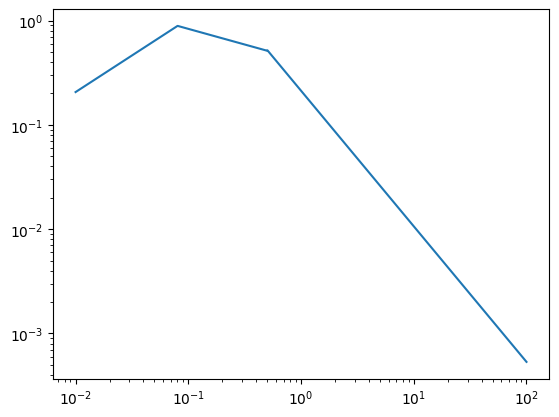

In [31]:
plt.loglog(mass, imf)

In [32]:
max_mass = 0.8
still_alive = mass <= max_mass
f_alive = np.trapz(imf[still_alive], mass[still_alive])
print(f"Mass fraction with M <= {max_mass:.2f} Msun = {f_alive:.3f}")

Mass fraction with M <= 0.80 Msun = 0.420
